# Identify the best source of recruitment for a tech startup, based on previous data of candidate sources and recruitment strategies
## HR analytics is one of the biggest areas of work data scientist. And improving hiring processes is one of the most important problems to solve in this field.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\My files\Study\MIT\MentorMind\10th Identify the best source of recruitment for a tech startup, based on previous data of candidate sources and recruitment strategies\Recruitment_Data.csv")
df

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online
...,...,...,...,...
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,NaN
444,0,4,1.598213,Applied Online


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
attrition,446.0,0.213004,0.409891,0.000000,0.000000,0.000000,0.000000,1.00000
performance_rating,446.0,2.894619,0.683755,1.000000,2.000000,3.000000,3.000000,5.00000
sales_quota_pct,446.0,1.082607,0.710042,-0.710827,0.584444,1.070143,1.532488,3.66674


In [5]:
df.isnull().sum()/len(df) #finding null values

attrition             0.000000
performance_rating    0.000000
sales_quota_pct       0.000000
recruiting_source     0.459641
dtype: float64

sine we have 45% missing value we will create special categeory called missing 

In [6]:
df['recruiting_source'].fillna('missing',inplace=True)
df

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,missing
2,1,2,0.497530,Campus
3,0,2,2.513958,missing
4,0,3,1.424789,Applied Online
...,...,...,...,...
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,missing
444,0,4,1.598213,Applied Online


In [7]:
df.recruiting_source.value_counts()

missing           205
Applied Online    130
Campus             56
Referral           45
Search Firm        10
Name: recruiting_source, dtype: int64

# EDA

In [8]:
df_obj=list(df.select_dtypes(include=['object']).columns)


In [9]:
for i in df_obj:
    df[i]=df[i].astype('category')
    

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   attrition           446 non-null    int64   
 1   performance_rating  446 non-null    int64   
 2   sales_quota_pct     446 non-null    float64 
 3   recruiting_source   446 non-null    category
dtypes: category(1), float64(1), int64(2)
memory usage: 11.2 KB


In [11]:
df.corr()

,attrition,performance_rating,sales_quota_pct
attrition,1.000000,-0.023964,-0.044476
performance_rating,-0.023964,1.000000,-0.011210
sales_quota_pct,-0.044476,-0.011210,1.000000


In [12]:
plot_column=['performance_rating','recruiting_source']

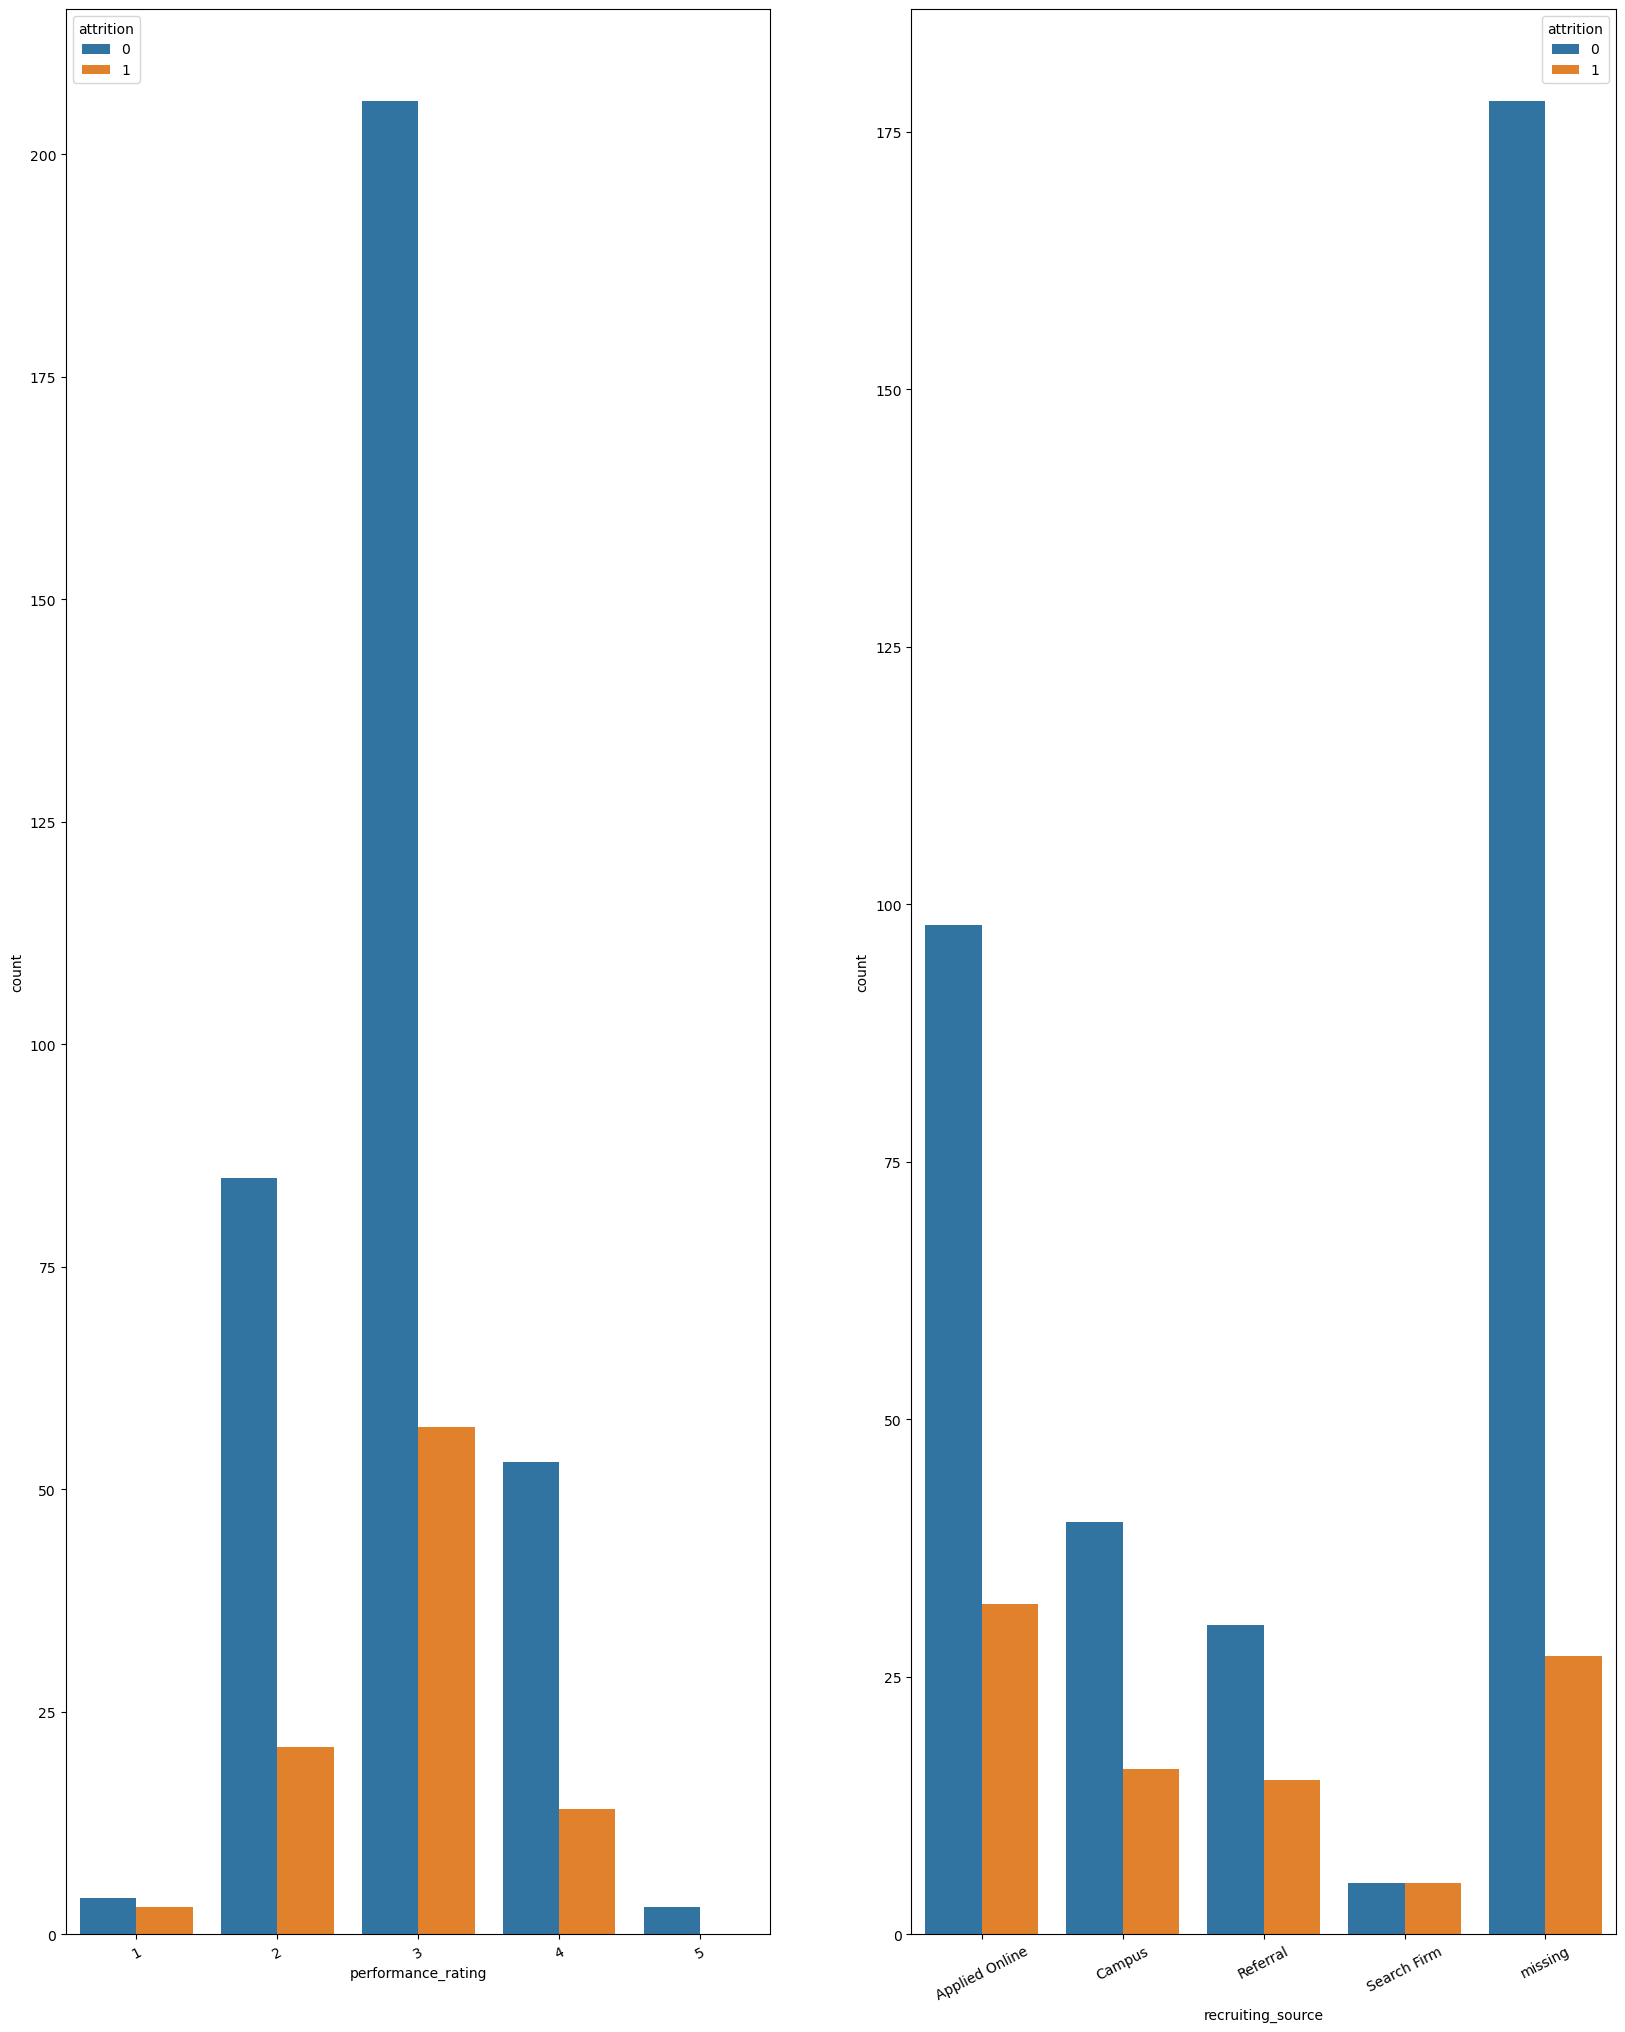

In [13]:
fig=plt.subplots(figsize=(20,25))
for p,q in enumerate(plot_column):
    plt.subplot(1,2,p+1)
    plt.subplots_adjust(hspace=1)
    sns.countplot(x=q,data=df,hue='attrition')
    plt.xticks(rotation=27)

In [14]:
df.groupby('performance_rating')['attrition'].agg(np.mean).sort_values(ascending=False)

performance_rating
1    0.428571
3    0.216730
4    0.208955
2    0.198113
5    0.000000
Name: attrition, dtype: float64

## Those who has a 1 performancee rating have a greater attrition rate

In [15]:
# Print out the average Attrition Number grouped by Recruiting Source
df.groupby('recruiting_source')['attrition'].agg(np.mean).sort_values(ascending=False)

recruiting_source
Search Firm       0.500000
Referral          0.333333
Campus            0.285714
Applied Online    0.246154
missing           0.131707
Name: attrition, dtype: float64

surprisingly missing recruting source has less attrition rate , as we are unaware about exact missing recruiting source we have to choose Applied online as best recruiting source because it has less attrition rate ,HRTEAM MUST be carefull while recruiting through search firm due to high attrition rate

In [16]:
df.groupby('recruiting_source')['performance_rating'].agg(np.mean).sort_values(ascending=False)

recruiting_source
Applied Online    2.930769
Campus            2.928571
missing           2.882927
Referral          2.844444
Search Firm       2.700000
Name: performance_rating, dtype: float64

The candidate which had recruited through Appled online has more performance rating,and those who were recruited through search firm has low performance rating

## Print out the average Sales Number grouped by Recruiting Source 

In [17]:
df.groupby('recruiting_source')['sales_quota_pct'].agg(np.mean).sort_values(ascending=False)

recruiting_source
missing           1.168109
Applied Online    1.058590
Referral          1.023198
Campus            0.908035
Search Firm       0.886960
Name: sales_quota_pct, dtype: float64

- those who was recruited from Applied online source has a great sale number and low attrition rate..
    

In [18]:
! pip install ggplot


Defaulting to user installation because normal site-packages is not writeable


In [19]:
!pip install pandas plotnine

Defaulting to user installation because normal site-packages is not writeable


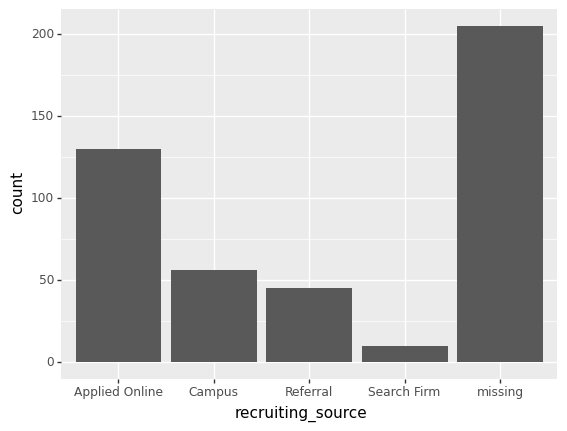

<ggplot: (173269945814)>

In [20]:
from plotnine import *

%matplotlib inline
ggplot(df, aes(x='recruiting_source')) + \
    geom_bar(stat = 'count')

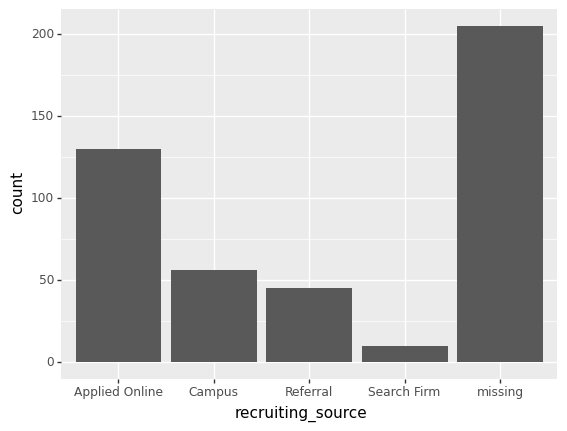

<ggplot: (173270003637)>

In [21]:
ggplot(df, aes(x='recruiting_source', fill = 'attrition')) + \
    geom_bar(stat = 'count')

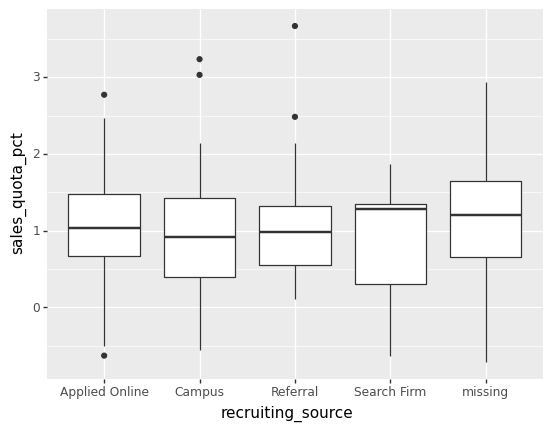

<ggplot: (173271180496)>

In [22]:
plt2 = ggplot(df, aes(x='recruiting_source', y='sales_quota_pct')) + \
           geom_boxplot()
plt2

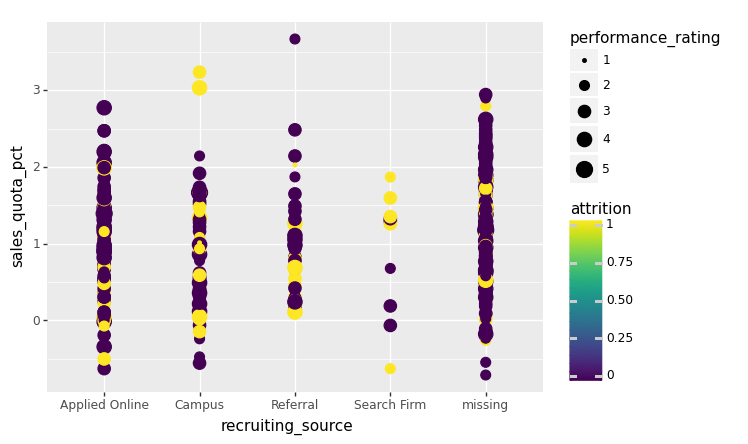

<ggplot: (173271140605)>

In [23]:
ggplot(df, aes(x='recruiting_source', y='sales_quota_pct', 
    size = 'performance_rating', color = 'attrition')) + geom_point()

In [24]:
cat_col=['recruiting_source']
df=pd.get_dummies(df,columns=cat_col,drop_first=True)
df

,attrition,performance_rating,sales_quota_pct,recruiting_source_Campus,recruiting_source_Referral,recruiting_source_Search Firm,recruiting_source_missing
0,1,3,1.088190,0,0,0,0
1,0,3,2.394173,0,0,0,1
2,1,2,0.497530,1,0,0,0
3,0,2,2.513958,0,0,0,1
4,0,3,1.424789,0,0,0,0
...,...,...,...,...,...,...,...
441,0,3,1.627813,1,0,0,0
442,1,4,0.689682,0,1,0,0
443,0,4,1.196198,0,0,0,1
444,0,4,1.598213,0,0,0,0


# Model Building
## Model 1: Logistic Regression

In [25]:
#Indentifying target variable,Here Y is target varibale and X is input variable
Y=df[['attrition']]
X=df.drop(columns=['attrition'])

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.70,random_state=42)

In [27]:
len(x_train),len(y_train),len(x_test),len(y_test)

(312, 312, 134, 134)

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [29]:
model=lr.fit(x_train,y_train)

In [30]:
model.score(x_train,y_train)

0.782051282051282

In [31]:
model.score(x_test,y_test)

0.7835820895522388

In [32]:
y_test['attrition_prediction']=model.predict(x_test)

Evaluating the model

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score=accuracy_score(y_test['attrition'],y_test['attrition_prediction'])

In [34]:
accuracy_score

0.7835820895522388

In [35]:
print(confusion_matrix(y_test['attrition'],y_test['attrition_prediction']))

[[105   1]
 [ 28   0]]


as TP =0 model is not predicting attrition very well

In [36]:
print(classification_report(y_test['attrition'],y_test['attrition_prediction']))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       106
           1       0.00      0.00      0.00        28

    accuracy                           0.78       134
   macro avg       0.39      0.50      0.44       134
weighted avg       0.62      0.78      0.70       134



## there is highly imbalance in data as model is not predicting attrition rate correctly <br>
### so to handle this we are using smote

In [37]:
df['attrition'].value_counts()

0    351
1     95
Name: attrition, dtype: int64

In [38]:
y_train.value_counts()

attrition
0            245
1             67
dtype: int64

In [39]:
! pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [54]:
from imblearn.over_sampling import SMOTE 
sm= SMOTE()

In [41]:
x_train_new,y_train_new=sm.fit_resample(x_train,y_train)

In [42]:
y_train_new.value_counts()

attrition
0            245
1            245
dtype: int64

In [43]:
lr_smote=LogisticRegression()

In [44]:
model_lr=lr_smote.fit(x_train_new,y_train_new)

In [45]:
y_test['attrition_prediction_smote']=model_lr.predict(x_test)

In [47]:
y_test['attrition']

284    0
358    1
117    0
423    1
70     0
      ..
153    0
131    0
26     0
7      0
405    0
Name: attrition, Length: 134, dtype: int64

In [48]:
y_test['attrition_prediction_smote']

284    0
358    0
117    0
423    1
70     1
      ..
153    0
131    0
26     0
7      1
405    1
Name: attrition_prediction_smote, Length: 134, dtype: int64

In [49]:
print(confusion_matrix(y_test['attrition'],y_test['attrition_prediction_smote']))

[[67 39]
 [13 15]]


In [50]:
print(classification_report(y_test['attrition'],y_test['attrition_prediction_smote']))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72       106
           1       0.28      0.54      0.37        28

    accuracy                           0.61       134
   macro avg       0.56      0.58      0.54       134
weighted avg       0.72      0.61      0.65       134



# Recall(TPR,sensititvity =(TP)/(TP+FN) is more imporant in attrittion Business perspective domain and we achieved quiet low value of FN i.e.12 
### collectively this model is not bad though we will check further algorithms like SVC,naive bayes ,decision tree ,random forest algorithm <br>
### Logistic Regression gives 61% accuracy

# Model 2 :Support vector classification Algorithm

In [59]:
X

,performance_rating,sales_quota_pct,recruiting_source_Campus,recruiting_source_Referral,recruiting_source_Search Firm,recruiting_source_missing
0,3,1.088190,0,0,0,0
1,3,2.394173,0,0,0,1
2,2,0.497530,1,0,0,0
3,2,2.513958,0,0,0,1
4,3,1.424789,0,0,0,0
...,...,...,...,...,...,...
441,3,1.627813,1,0,0,0
442,4,0.689682,0,1,0,0
443,4,1.196198,0,0,0,1
444,4,1.598213,0,0,0,0


In [68]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X,Y,train_size=0.70,random_state=42)

In [61]:
from sklearn.svm import SVC

In [63]:
model=SVC(C=1.0,
    kernel='rbf')

In [65]:
model_svc=model.fit(x_train1,y_train1)

In [66]:
model_svc.score(x_train1,y_train1)

0.7852564102564102

In [69]:
model_svc.score(x_test1,y_test1)

0.7910447761194029

In [70]:
y_test1['predicted_attrition']=model_svc.predict(x_test1)

In [73]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [72]:
accuracy_score(y_test1['attrition'],y_test1['predicted_attrition'],normalize=True)

0.7910447761194029

In [76]:
print(confusion_matrix(y_test1['attrition'],y_test1['predicted_attrition']))

[[106   0]
 [ 28   0]]


In [82]:
print(classification_report(y_test1['attrition'],y_test1['predicted_attrition']))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       106
           1       0.00      0.00      0.00        28

    accuracy                           0.79       134
   macro avg       0.40      0.50      0.44       134
weighted avg       0.63      0.79      0.70       134



## there is highly imbalance in data as model is not predicting attrition rate correctly <br>
### so to handle this we are using smote

In [77]:
df.attrition.value_counts()

0    351
1     95
Name: attrition, dtype: int64

In [78]:
x_train1_new,y_train1_new=sm.fit_resample(x_train1,y_train1)

In [79]:
model_svc_smote=model.fit(x_train1_new,y_train1_new)

In [84]:
y_train1_new.value_counts()

attrition
0            245
1            245
dtype: int64

In [80]:
y_test1['attrition_prediction_smote']=model_svc_smote.predict(x_test1)

In [85]:
y_test1['attrition_prediction_smote']

284    0
358    0
117    0
423    0
70     1
      ..
153    0
131    1
26     0
7      1
405    1
Name: attrition_prediction_smote, Length: 134, dtype: int64

In [86]:
accuracy_score(y_test1['attrition'],y_test1['attrition_prediction_smote'],normalize=True)

0.6044776119402985

In [87]:
print(confusion_matrix(y_test1['attrition'],y_test1['attrition_prediction_smote']))

[[66 40]
 [13 15]]


In [88]:
print(classification_report(y_test1['attrition'],y_test1['attrition_prediction_smote']))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71       106
           1       0.27      0.54      0.36        28

    accuracy                           0.60       134
   macro avg       0.55      0.58      0.54       134
weighted avg       0.72      0.60      0.64       134



In [90]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

# Recall(TPR,sensititvity =(TP)/(TP+FN) is more imporant in attrittion Business perspective domain and we achieved quiet low value of FN i.e.13
### collectively this model is not bad though we will check further algorithms like naive bayes ,decision tree ,random forest algorithm <br>
### SVC gives 61% accuracy

# Hyperparameter Tuning
Now, we have multiple hyperparameters to optimise -

- The choice of kernel (linear, rbf etc.)
- C
- gamma
We'll use the GridSearchCV() method to tune the hyperparameters.

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [93]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train1_new, y_train1_new) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [95]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017029,0.002781,0.006250,0.007655,1,0.01,"{'C': 1, 'gamma': 0.01}",0.602041,0.479592,0.520408,...,0.512245,0.057506,9,0.548469,0.505102,0.607143,0.586735,0.563776,0.562245,0.034851
1,0.009387,0.007664,0.015623,0.000140,1,0.001,"{'C': 1, 'gamma': 0.001}",0.489796,0.479592,0.479592,...,0.479592,0.011178,10,0.502551,0.505102,0.505102,0.510204,0.502551,0.505102,0.002795
2,0.010686,0.006402,0.006260,0.007667,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.489796,0.479592,0.479592,...,0.479592,0.011178,10,0.502551,0.505102,0.505102,0.510204,0.502551,0.505102,0.002795
3,0.011940,0.010758,0.012511,0.006255,10,0.01,"{'C': 10, 'gamma': 0.01}",0.612245,0.632653,0.632653,...,0.595918,0.049403,4,0.607143,0.602041,0.622449,0.609694,0.609694,0.610204,0.006730
4,0.019532,0.003101,0.003149,0.006298,10,0.001,"{'C': 10, 'gamma': 0.001}",0.581633,0.479592,0.540816,...,0.516327,0.046805,8,0.551020,0.505102,0.609694,0.589286,0.566327,0.564286,0.035692
5,0.016914,0.002625,0.001305,0.002611,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.489796,0.479592,0.479592,...,0.479592,0.011178,10,0.502551,0.505102,0.505102,0.510204,0.502551,0.505102,0.002795
6,0.023247,0.007071,0.012563,0.006282,100,0.01,"{'C': 100, 'gamma': 0.01}",0.622449,0.632653,0.591837,...,0.602041,0.024995,3,0.609694,0.602041,0.617347,0.619898,0.614796,0.612755,0.006331
7,0.015706,0.000135,0.009376,0.007655,100,0.001,"{'C': 100, 'gamma': 0.001}",0.612245,0.632653,0.632653,...,0.595918,0.049403,4,0.607143,0.602041,0.625000,0.609694,0.609694,0.610714,0.007670
8,0.015595,0.000100,0.000000,0.000000,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.581633,0.479592,0.551020,...,0.518367,0.048035,7,0.551020,0.505102,0.612245,0.589286,0.563776,0.564286,0.036343
9,0.075032,0.035496,0.006255,0.007661,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.632653,0.653061,0.632653,...,0.618367,0.031352,1,0.642857,0.617347,0.635204,0.653061,0.640306,0.637755,0.011746


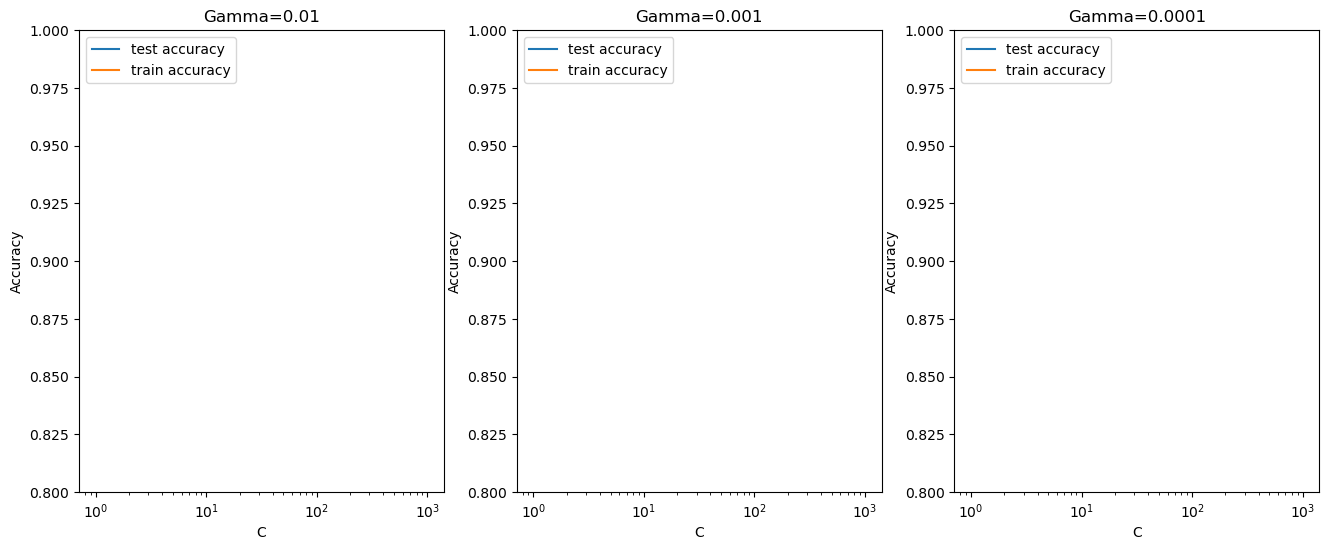

In [96]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [97]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.6183673469387754 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


The best test score is 0.6183673469387754 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}
Though sklearn suggests the optimal scores mentioned above (gamma=0.001, C=100), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~60.5%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:

High gamma (i.e. high non-linearity) and average value of C
Low gamma (i.e. less non-linearity) and high value of C
We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.01 and a high C=1000.

# Model 3:Naive bayes Algorithm

In [103]:
x_train2,x_test2,y_train2,y_test2=train_test_split(X,Y,train_size=0.70,random_state=42)

In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
nb=GaussianNB()

In [107]:
model_nb=nb.fit(x_train2,y_train2)

In [108]:
model_nb.score(x_train2,y_train2)

0.7884615384615384

In [109]:
y_train2.value_counts()

attrition
0            245
1             67
dtype: int64

its clearly a case of model overfitting so before procedding to model we first apply smote 

In [110]:
x_train2_new,y_train2_new=sm.fit_resample(x_train2,y_train2)

In [111]:
model_nb=nb.fit(x_train2_new,y_train2_new)

In [112]:
y_test2['predicted_attrition_nb']=model_nb.predict(x_test2)

In [113]:
accuracy_score(y_test2['attrition'],y_test2['predicted_attrition_nb'],normalize=True)

0.7014925373134329

In [114]:
print(confusion_matrix(y_test1['attrition'],y_test2['predicted_attrition_nb']))

[[83 23]
 [17 11]]


In [115]:
print(classification_report(y_test1['attrition'],y_test2['predicted_attrition_nb']))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       106
           1       0.32      0.39      0.35        28

    accuracy                           0.70       134
   macro avg       0.58      0.59      0.58       134
weighted avg       0.72      0.70      0.71       134



In [116]:
print("precision", metrics.precision_score(y_test1['attrition'],y_test2['predicted_attrition_nb']))
print("sensitivity/recall", metrics.recall_score(y_test1['attrition'],y_test2['predicted_attrition_nb']))

precision 0.3235294117647059
sensitivity/recall 0.39285714285714285


## naive bayes algorithm give 70 % accuracy 

 # Model 4 Decision Tree 

In [119]:
x_train3,x_test3,y_train3,y_test3=train_test_split(X,Y,train_size=0.70,random_state=42)

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dt=DecisionTreeClassifier(max_depth=3)

In [145]:
dt

DecisionTreeClassifier(max_depth=3)

as we already have built model so we are well aware that we have to apply SMoTE for data avoiding overfitting 

In [125]:
x_train3_new,y_train3_new=sm.fit_resample(x_train3,y_train3)

In [127]:
model_dt=dt.fit(x_train3_new,y_train3_new)

In [128]:
y_test3['predicted_attrition_dt']=model_dt.predict(x_test3)

In [129]:
accuracy_score(y_test3['attrition'],y_test3['predicted_attrition_dt'],normalize=True)

0.40298507462686567

In [130]:
print(confusion_matrix(y_test3['attrition'],y_test3['predicted_attrition_dt']))

[[34 72]
 [ 8 20]]


In [131]:
print(classification_report(y_test3['attrition'],y_test3['predicted_attrition_dt']))

              precision    recall  f1-score   support

           0       0.81      0.32      0.46       106
           1       0.22      0.71      0.33        28

    accuracy                           0.40       134
   macro avg       0.51      0.52      0.40       134
weighted avg       0.69      0.40      0.43       134



In [133]:
print("precision",metrics.precision_score(y_test3['attrition'],y_test3['predicted_attrition_dt']))

precision 0.21739130434782608


In [135]:
print("recall is",metrics.recall_score(y_test3['attrition'],y_test3['predicted_attrition_dt']))

recall is 0.7142857142857143


In [136]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

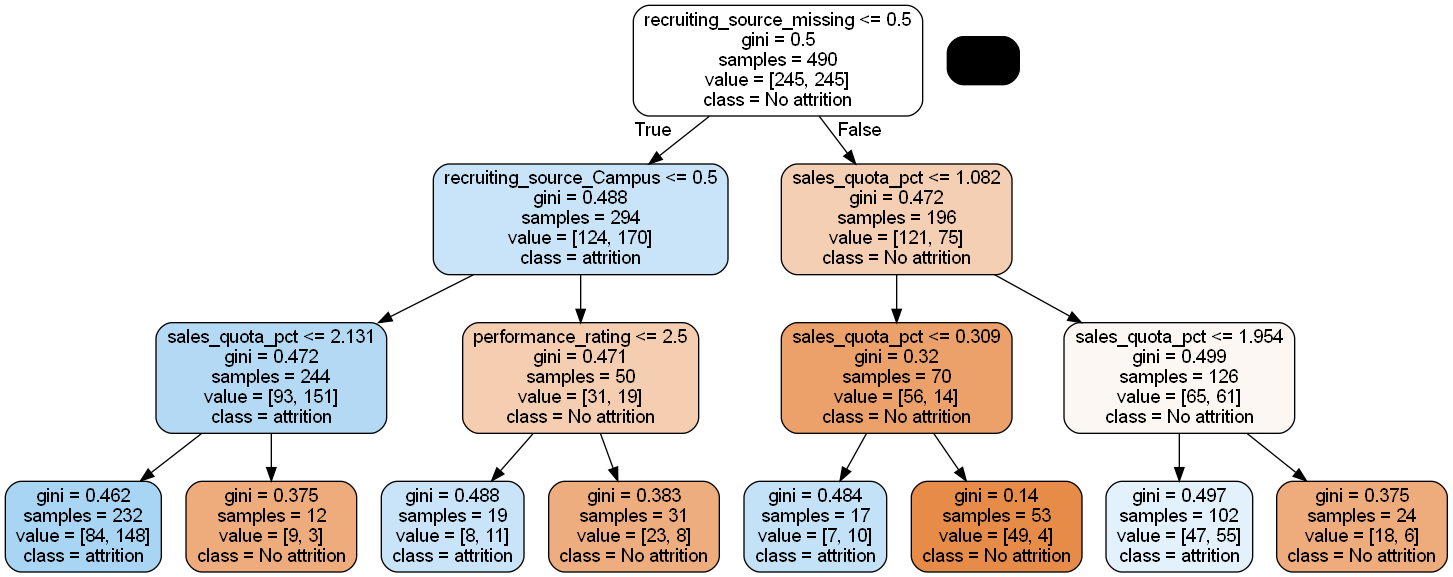

In [137]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No attrition', "attrition"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

## hyper_parameter tuning for best parameter 

In [138]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [139]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [140]:

%%time
grid_search.fit(x_train3_new,y_train3_new)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 6.61 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [141]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007254,0.000430,0.003247,0.000433,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.569106,0.552846,0.622951,0.614754,0.589914,0.029646,31
1,0.008253,0.000433,0.003000,0.000003,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.569106,0.552846,0.622951,0.614754,0.589914,0.029646,31
2,0.010753,0.005356,0.003001,0.000005,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.569106,0.552846,0.704918,0.614754,0.610406,0.059098,7
3,0.007503,0.000497,0.003249,0.000433,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.577236,0.552846,0.639344,0.573770,0.585799,0.032292,35
4,0.003748,0.000830,0.001751,0.000433,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.577236,0.585366,0.639344,0.573770,0.593929,0.026556,21


In [142]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)

## Thus we get best estimator as criterion='entropy', max_depth=10, min_samples_leaf=5

In [143]:
dt_best = grid_search.best_estimator_

In [146]:
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)

In [147]:
model_dt=dt_best.fit(x_train3_new,y_train3_new)

In [148]:
y_test3['predicted_attrition__best_para_dt']=model_dt.predict(x_test3)

In [149]:
accuracy_score(y_test3['attrition'],y_test3['predicted_attrition__best_para_dt'],normalize=True)

0.5

In [150]:
print(confusion_matrix(y_test3['attrition'],y_test3['predicted_attrition__best_para_dt']))

[[54 52]
 [15 13]]


In [151]:
print(classification_report(y_test3['attrition'],y_test3['predicted_attrition__best_para_dt']))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62       106
           1       0.20      0.46      0.28        28

    accuracy                           0.50       134
   macro avg       0.49      0.49      0.45       134
weighted avg       0.66      0.50      0.55       134



In [152]:
print("precision",metrics.precision_score(y_test3['attrition'],y_test3['predicted_attrition__best_para_dt']))

precision 0.2


In [153]:
print("recall",metrics.recall_score(y_test3['attrition'],y_test3['predicted_attrition__best_para_dt']))

recall 0.4642857142857143


## in  order to get best recall which is best metrics for HR attrition domain we have to compromise the accuracy so decision tree is best model which gives 46% recall 

### Now we will check for our final model i.e Random forest 

# Model 5:Random forest classifier

In [154]:
x_train4,x_test4,y_train4,y_test4=train_test_split(X,Y,train_size=0.70,random_state=42)

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rf=RandomForestClassifier(n_estimators=100)

In [157]:
x_train4_new,y_train4_new=sm.fit_resample(x_train4,y_train4)

In [158]:
model_rf=rf.fit(x_train4,y_train4)

In [159]:
y_test4['Predicted_attrition_rf']=model_rf.predict(x_test4)


In [160]:
accuracy_score(y_test4['attrition'],y_test4['Predicted_attrition_rf'],normalize=True)

0.7014925373134329

In [161]:
print(confusion_matrix(y_test4['attrition'],y_test4['Predicted_attrition_rf']))

[[83 23]
 [17 11]]


In [164]:
print(classification_report(y_test4['attrition'],y_test4['Predicted_attrition_rf']))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       106
           1       0.17      0.25      0.21        28

    accuracy                           0.60       134
   macro avg       0.48      0.47      0.47       134
weighted avg       0.65      0.60      0.62       134



In [165]:
print("precision",metrics.precision_score(y_test4['attrition'],y_test4['Predicted_attrition_rf']))

precision 0.175


In [166]:
print("Recall",metrics.recall_score(y_test4['attrition'],y_test4['Predicted_attrition_rf']))

Recall 0.25
